# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [6]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [7]:
cat=Table.read('./data/dmu26_PACS_NGP_cat_both.fits')

In [8]:
cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J133555.048+274811.268,203.97936481737565,27.80312986880962,17.572418,33.597706,5.45511,4.6827497,11.626414,1.1187835,0.0020112132,0.0010228779,0.002440578,0.0016702752,1.0008092,0.9989723,2000.0,2000.0,1.0,1.0
HELP_J133556.012+274830.207,203.98338384654164,27.808390868127034,42.88248,60.314697,25.506334,9.101201,20.8438,2.3250988,0.0020112132,0.0010228779,0.002440578,0.0016702752,1.0008706,1.0005337,1069.0,2000.0,1.0,1.0
HELP_J133602.426+274819.988,204.01010836366925,27.805552254275533,17.76198,33.575005,6.445254,13.007115,26.249056,4.1110287,0.0020112132,0.0010228779,0.002440578,0.0016702752,0.999474,1.0001668,2000.0,2000.0,1.0,1.0
HELP_J133517.733+274714.860,203.8238887640653,27.787461158345693,5.438993,13.2706375,1.5268406,13.492562,27.89849,4.224732,0.0018842206,0.0015031687,0.0023463664,0.0017408923,0.9996572,1.0002385,2000.0,2000.0,1.0,1.0
HELP_J133518.553+274726.086,203.82730328327634,27.79057941884752,6.191412,14.963298,1.6409394,66.48767,83.98603,48.820625,0.0018842206,0.0015031687,0.0023463664,0.0017408923,0.99968725,0.9995257,2000.0,2000.0,1.0,1.0
HELP_J133522.885+274703.805,203.84535497546153,27.78439031777235,16.470327,31.095762,5.49362,18.53725,33.6554,7.111447,0.0018842206,0.0015031687,0.0023463664,0.0017408923,1.0001143,0.9989411,2000.0,2000.0,1.0,1.0
HELP_J133523.788+274740.565,203.8491177030722,27.79460138204167,12.375525,25.591707,3.9326146,12.075464,24.082674,3.7165306,0.0018842206,0.0015031687,0.0023463664,0.0017408923,0.9995133,0.9995677,2000.0,2000.0,1.0,1.0
HELP_J133525.029+274642.429,203.85428832961216,27.778452387863254,4.080105,10.127521,1.0452051,43.444332,61.574207,26.73113,0.0018842206,0.0015031687,0.0023463664,0.0017408923,1.0003793,0.9997398,2000.0,2000.0,1.0,1.0


## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


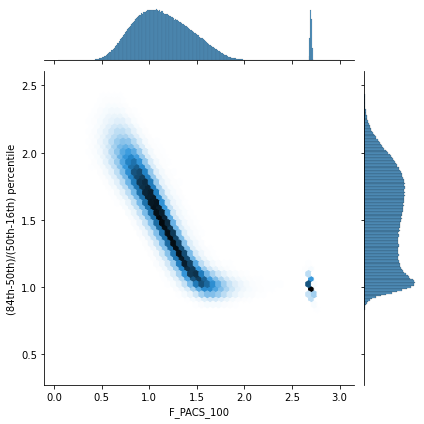

In [10]:
skew=(cat['FErr_PACS_100_u']-cat['F_PACS_100'])/(cat['F_PACS_100']-cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 2.5 
n_use=skew> 2.5
g=sns.jointplot(x=np.log10(cat['F_PACS_100'][use]),y=skew[use], kind='hex')

g.savefig('../../data/figs/sk_PACS100_NGP.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS100_NGP.pdf', bbox='tight')

In [10]:
10**1.4

25.118864315095795

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


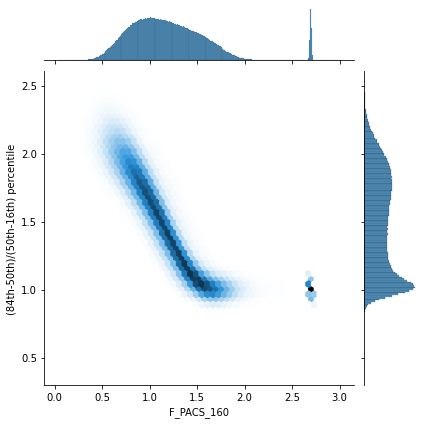

In [11]:
skew=(cat['FErr_PACS_160_u']-cat['F_PACS_160'])/(cat['F_PACS_160']-cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 2.5
g=sns.jointplot(x=np.log10(cat['F_PACS_160'][use]),y=skew[use], kind='hex')

g.savefig('../../data/figs/sk_PACS160_NGP.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS160_NGP.pdf', bbox='tight')

In [11]:
10**1.4

25.118864315095795

## Add flag to catalogue

In [20]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_100'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_160'))


In [22]:
ind_100=(cat['Pval_res_100']>0.5) | (cat['F_PACS_100'] < 25)
ind_160=(cat['Pval_res_160']>0.5) | (cat['F_PACS_160'] < 25)


In [23]:
print(ind_100.sum(),ind_160.sum(),len(cat))

1198286 1197921 1232636


In [24]:
cat['flag_PACS_100'][ind_100]=True
cat['flag_PACS_160'][ind_160]=True

In [25]:
cat.write('./data/dmu26_XID+PACS_NGP_cat_20200714.fits', format='fits',overwrite=True)
